In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [30]:
X = df.drop(columns=['Prediction', 'Email No.'], axis=1)
y = df['Prediction']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, X_test.shape)

(4137, 3000) (1035, 3000)


In [31]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_roc_auc = roc_auc_score(y_test, y_pred)
knn_cm = confusion_matrix(y_test, y_pred)

print("K-Nearest Neighbors Classifier:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print(f"ROC AUC: {knn_roc_auc}")

K-Nearest Neighbors Classifier:
Accuracy: 0.8763285024154589
Precision: 0.7449856733524355
Recall: 0.8695652173913043
F1 Score: 0.8024691358024691
ROC AUC: 0.874320652173913
Confusion Matrix:
[[647  89]
 [ 39 260]]


In [32]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)
svm_roc_auc = roc_auc_score(y_test, y_pred)
svm_cm = confusion_matrix(y_test, y_pred)

print("Support Vector Machine Classifier:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"ROC AUC: {svm_roc_auc}")

Support Vector Machine Classifier:
Accuracy: 0.808695652173913
Precision: 0.8796992481203008
Recall: 0.391304347826087
F1 Score: 0.5416666666666667
ROC AUC: 0.6847826086956521
Confusion Matrix:
[[720  16]
 [182 117]]


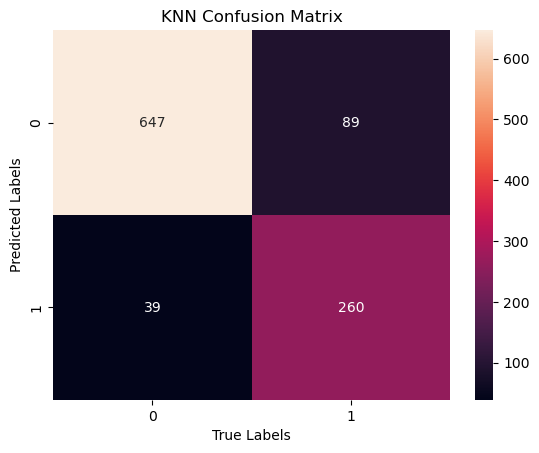

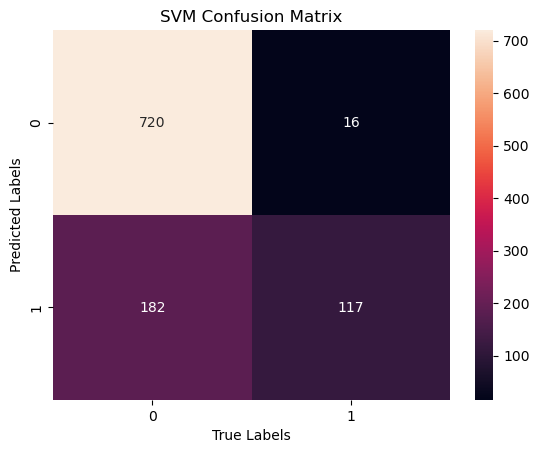

In [33]:
sns.heatmap(knn_cm, annot=True, fmt='d')
plt.ylabel("Predicted Labels")
plt.xlabel("True Labels")
plt.title("KNN Confusion Matrix")
plt.show()

sns.heatmap(svm_cm, annot=True, fmt='d')
plt.ylabel("Predicted Labels")
plt.xlabel("True Labels")
plt.title("SVM Confusion Matrix")
plt.show()

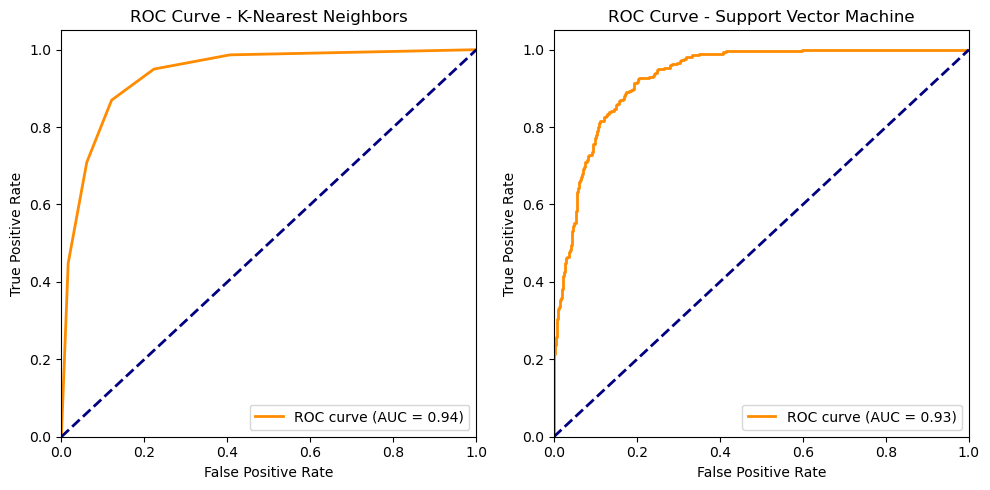

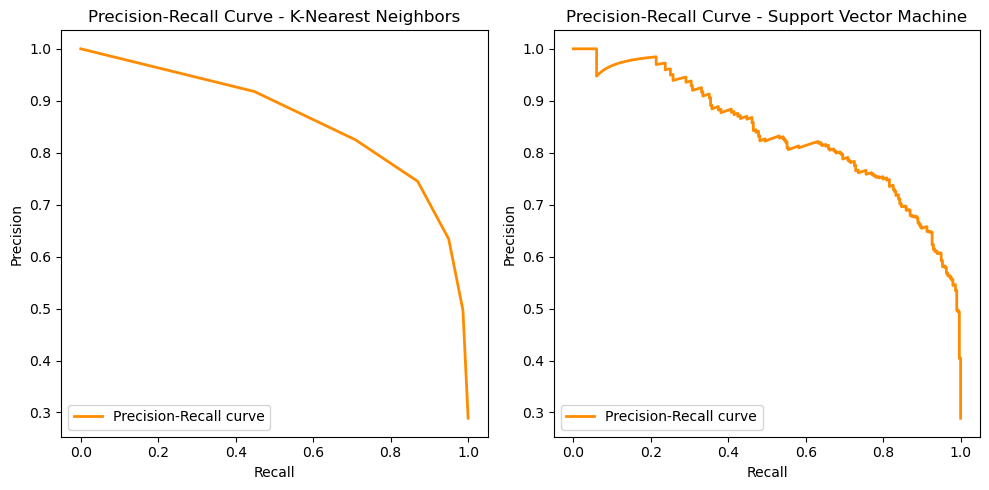

In [34]:
# ROC curve and AUC for K-Nearest Neighbors
knn_y_score = knn_classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_y_score)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC curve and AUC for Support Vector Machine
svm_y_score = svm_classifier.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_score)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# Precision-recall curve for K-Nearest Neighbors
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_y_score)

# Precision-recall curve for Support Vector Machine
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_y_score)

# Plot precision-recall curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall_knn, precision_knn, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - K-Nearest Neighbors')
plt.legend(loc="lower left")

plt.subplot(1, 2, 2)
plt.plot(recall_svm, precision_svm, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Support Vector Machine')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()